# 1. Getting data

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

https://docs.pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data instead
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.71MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 114kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.23MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.3MB/s]


In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image, label = train_data[0]

image.shape

torch.Size([1, 28, 28])

[color_channels=1, height=28, width=28] CHW

color channels = 1 = grayscale

color channels = 3 = RGB color model

pytorch generally accepts NCHW -> N is number of images (when we use batch sizes) https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_names = train_data.classes

In [ ]:
image.squeeze().shape

torch.Size([28, 28])

Text(0.5, 1.0, '4 - Coat')

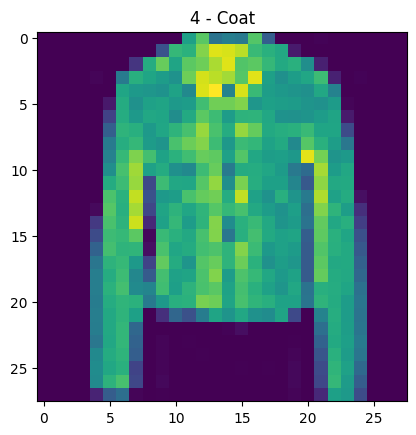

In [ ]:
image, label = test_data[10]
plt.imshow(image.squeeze())
plt.title(f"{label} - {class_names[label]}")

Text(0.5, 1.0, '4 - Coat')

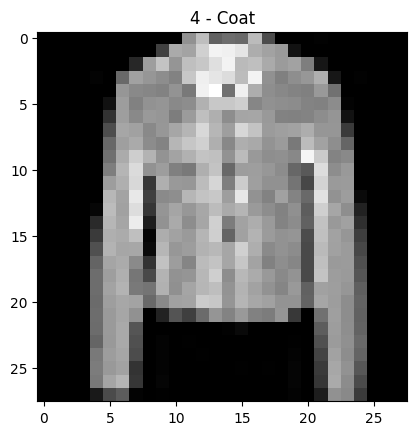

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{label} - {class_names[label]}")

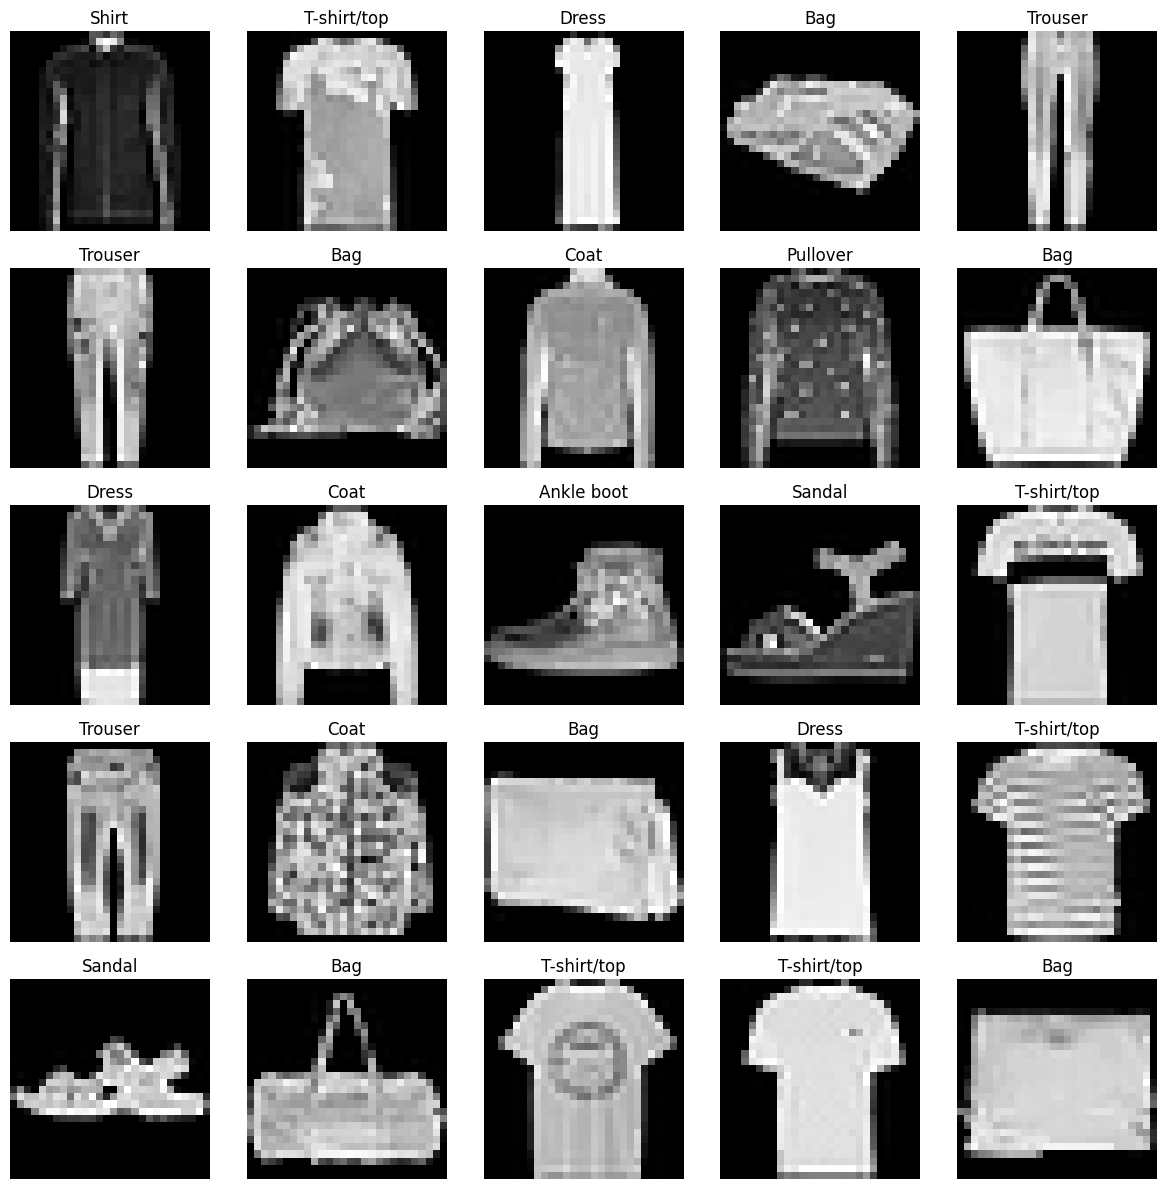

In [ ]:
fig = plt.figure(figsize=(12, 12))
rows, cols = 5, 5

for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_index]

    ax = fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")

plt.tight_layout()
plt.show()

# 2. DataLoader

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7903010d6950>, <torch.utils.data.dataloader.DataLoader object at 0x7903001d2f90>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


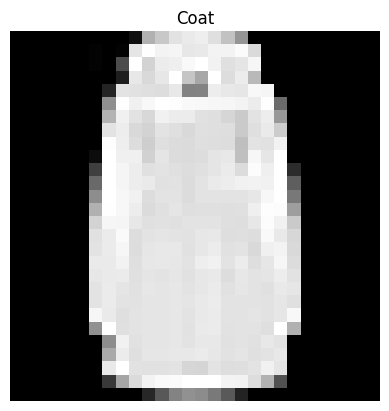

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Buidling a model

## Model 0 : baseline model

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
print(x.shape)

output = flatten_model(x)

print(output.shape)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

torch.Size([1, 28, 28])
torch.Size([1, 784])
Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
class FashionMNISTModel0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model0 = FashionMNISTModel0(input_shape=784, hidden_units=10, output_shape=len(class_names))
model0.to("cpu")

FashionMNISTModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
len(train_dataloader)

1875

In [ ]:
def accuracy_fn(y_true, y_preds):
    right = torch.eq(y_true, y_preds).sum().item()
    acc = (right / len(y_preds)) * 100
    return acc

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):

        model0.train()
        y_preds = model0(X)

        loss = loss_fn(y_preds, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_preds = model0(X)
            test_loss += loss_fn(test_preds, y)
            test_acc += accuracy_fn(y, test_preds.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


train_time_end_on_cpu = timer()
total_train_time_model0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Epoch: 3
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.44251 | Test loss: 0.46306, Test acc: 83.75%

Epoch: 4
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samp

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    loss, acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            y_preds = model(X)

            loss += loss_fn(y_preds, y)
            acc += accuracy_fn(y, y_preds.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [ ]:
model0_results = eval_model(model0, test_dataloader, loss_fn, accuracy_fn)

model0_results

{'model_name': 'FashionMNISTModel0',
 'model_loss': 0.4686937928199768,
 'model_acc': 83.2667731629393}

## Model 1 : better model with non linearity

In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Epoch: 3
---------
Train loss: 0.64384 | Train accuracy: 76.52%
Test loss: 0.65079 | Test accuracy: 76.13%

Epoch: 4
---------
Train loss: 0.62892 | Train accuracy: 77.00%
Test loss: 0.65277 | Test accuracy: 75.95%

Train time on cuda: 45.595 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6527653336524963,
 'model_acc': 75.94848242811501}

## Model 2 : Building a CNN

In [ ]:
class FashionMNISTCNNModel2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block1(x)
        # print(x.shape)
        x = self.block2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [ ]:
torch.manual_seed(42)

model2 = FashionMNISTCNNModel2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [ ]:
model2

FashionMNISTCNNModel2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59363 | Train accuracy: 78.48%
Test loss: 0.40161 | Test accuracy: 85.64%

Epoch: 1
---------
Train loss: 0.36595 | Train accuracy: 86.83%
Test loss: 0.35399 | Test accuracy: 86.83%

Epoch: 2
---------
Train loss: 0.32454 | Train accuracy: 88.28%
Test loss: 0.31852 | Test accuracy: 88.55%

Epoch: 3
---------
Train loss: 0.30378 | Train accuracy: 88.98%
Test loss: 0.33614 | Test accuracy: 87.80%

Epoch: 4
---------
Train loss: 0.29084 | Train accuracy: 89.49%
Test loss: 0.30283 | Test accuracy: 89.37%

Train time on cuda: 55.520 seconds


In [ ]:
model_2_results = eval_model(
    model=model2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

{'model_name': 'FashionMNISTCNNModel2',
 'model_loss': 0.30282530188560486,
 'model_acc': 89.36701277955271}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel0,0.468694,83.266773
1,FashionMNISTModelV1,0.652765,75.948482
2,FashionMNISTCNNModel2,0.302825,89.367013


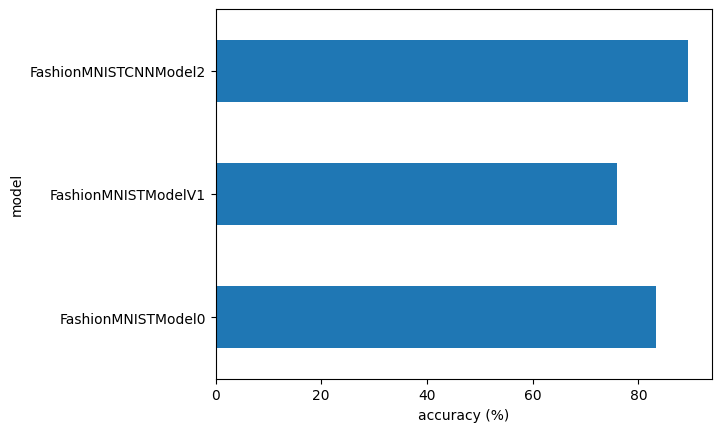

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# 4. Testing and evaluating model 2

In [ ]:
test_samples = []
test_labels = []
for sample, label in test_data:
    test_samples.append(sample)
    test_labels.append(label)

In [ ]:
len(test_samples), test_samples[0].size()

(10000, torch.Size([1, 28, 28]))

In [ ]:
test_labels[0]

9

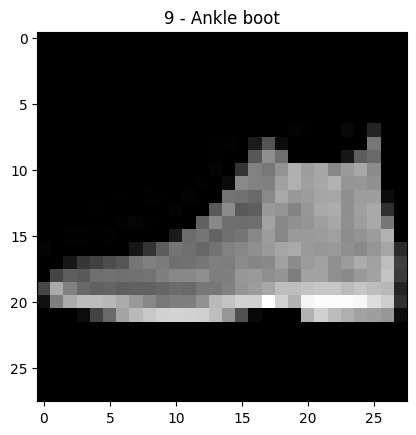

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(f"{test_labels[0]} - {class_names[test_labels[0]]}")
plt.show()

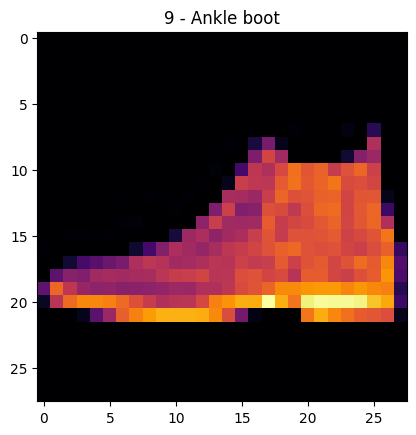

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="inferno")  # or 'viridis', 'plasma', 'magma'
plt.title(f"{test_labels[0]} - {class_names[test_labels[0]]}")
plt.show()

In [ ]:
sample = torch.unsqueeze(test_samples[0], dim=0).to(device)

In [ ]:
sample.shape

torch.Size([1, 1, 28, 28])

In [ ]:
pred_logits = model2(sample)

In [ ]:
pred_logits

tensor([[-3.3959, -4.6965, -1.3057, -3.9153, -4.7827,  4.3320, -3.7219,  5.5724,
          1.9981, 10.6530]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
pred_logits.squeeze()

tensor([-3.3959, -4.6965, -1.3057, -3.9153, -4.7827,  4.3320, -3.7219,  5.5724,
         1.9981, 10.6530], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
pred_prob = torch.softmax(pred_logits)

TypeError: softmax() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

In [ ]:
pred_prob

tensor([7.8543e-07, 2.1391e-07, 6.3510e-06, 4.6721e-07, 1.9625e-07, 1.7835e-03,
        5.6691e-07, 6.1659e-03, 1.7285e-04, 9.9187e-01], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [ ]:
pred = torch.argmax(pred_prob)

In [ ]:
pred

tensor(9, device='cuda:0')

In [ ]:
test_labels[0]

9

In [ ]:
import matplotlib.pyplot as plt
import torch

def show_predictions(model, samples, labels, class_names, device, rows=5, cols=5):
    fig = plt.figure(figsize=(12, 12))
    model.eval()

    for i in range(1, rows * cols + 1):
        idx = torch.randint(0, len(samples), (1,)).item()
        img, true_label = samples[idx], labels[idx]
        sample = img.unsqueeze(0).to(device)

        with torch.no_grad():
            pred = torch.argmax(torch.softmax(model(sample), dim=1)).item()

        plt.subplot(rows, cols, i)
        if img.shape[0] == 1:
            plt.imshow(img.squeeze(), cmap="gray")
        else:
            plt.imshow(img.permute(1, 2, 0))  # RGB

        color = "green" if pred == true_label else "red"
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred]}", color=color, fontsize=12)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

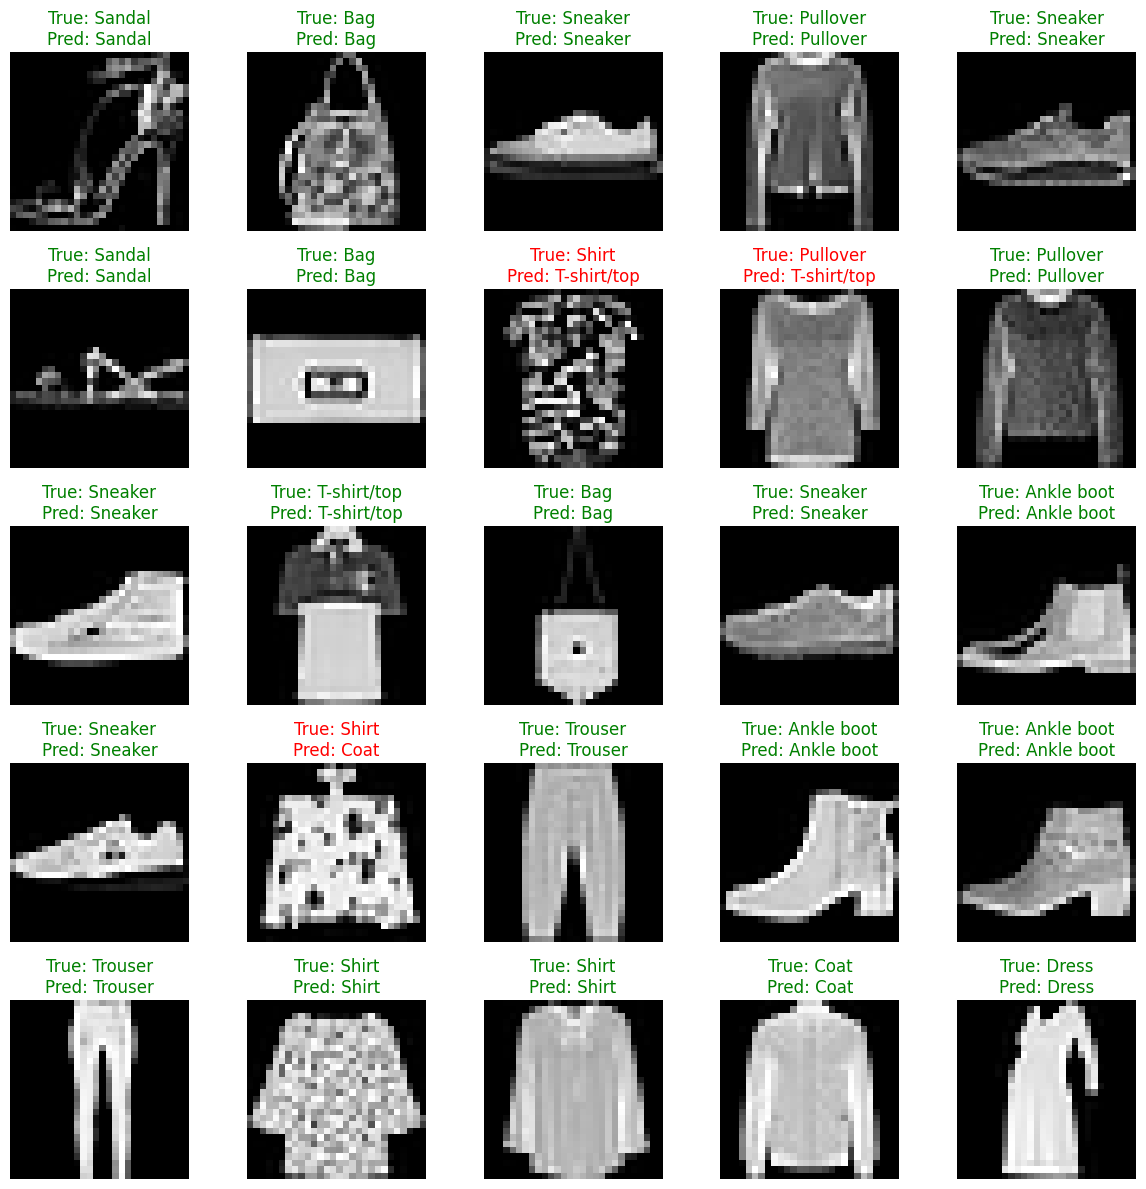

In [ ]:
show_predictions(model2, test_samples, test_labels, class_names, device)

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torchmetrics.classification import MulticlassAccuracy, MulticlassConfusionMatrix

def evaluate_model(model, dataloader, num_classes, class_names, device):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.append(preds)
            all_labels.append(labels)

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    acc = MulticlassAccuracy(num_classes=num_classes).to(device)
    accuracy = acc(all_preds, all_labels)

    cm = MulticlassConfusionMatrix(num_classes=num_classes).to(device)
    confmat = cm(all_preds, all_labels).cpu().numpy()

    print(f"Accuracy: {accuracy.item() * 100:.2f}%")

    plt.figure(figsize=(10, 8))
    cm_df = pd.DataFrame(confmat, index=class_names, columns=class_names)
    sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="Blues", cbar=True, square=True)

    plt.title("Confusion Matrix", fontsize=14, pad=15)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return accuracy.item(), confmat

Accuracy: 89.37%


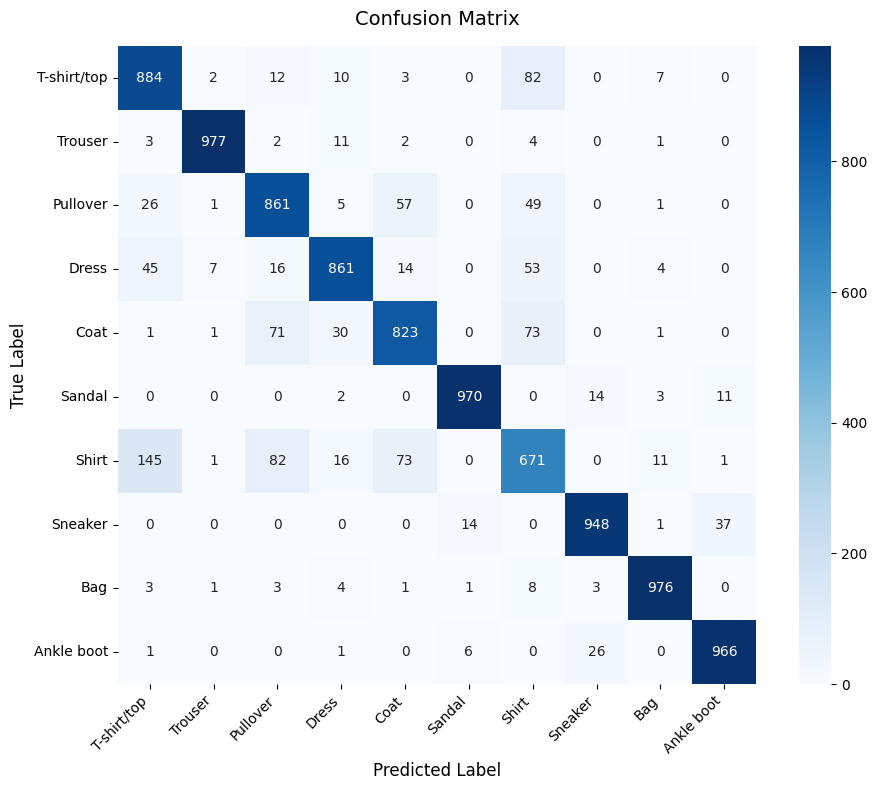

In [ ]:
accuracy, confmat = evaluate_model(
    model=model2,
    dataloader=test_dataloader,
    num_classes=len(class_names),
    class_names=class_names,
    device=device
)

Accuracy: 90.58%


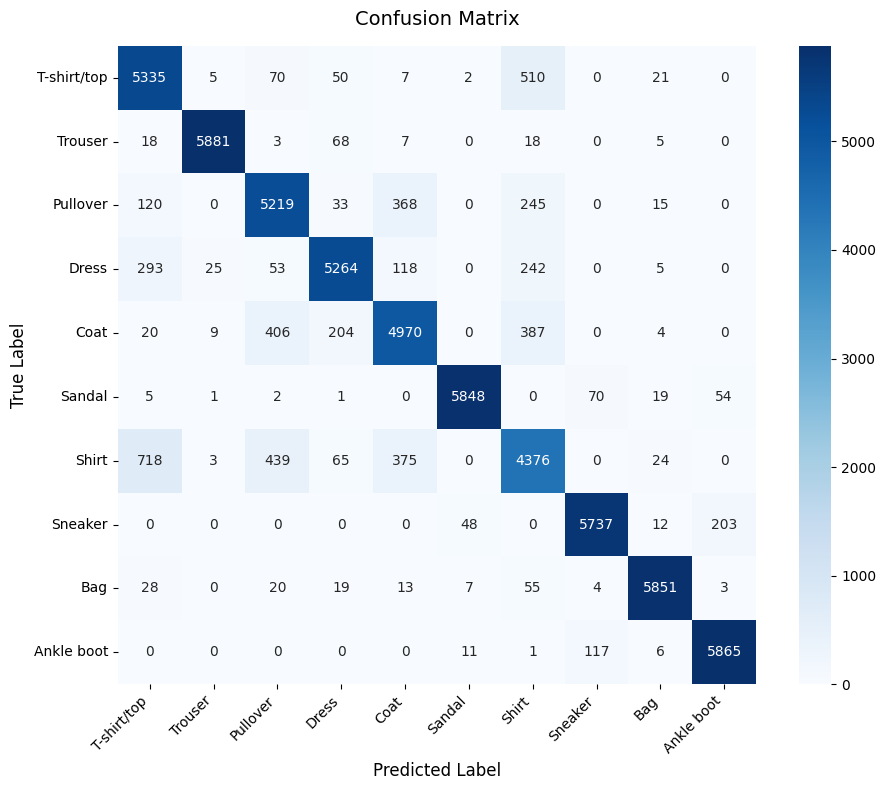

In [ ]:
accuracy, confmat = evaluate_model(
    model=model2,
    dataloader=train_dataloader,
    num_classes=len(class_names),
    class_names=class_names,
    device=device
)

# 5. Saving and loading model

In [ ]:
MODEL_PATH = "model2.pth"
torch.save(model2.state_dict(), MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

Model saved to model2.pth


In [ ]:
model_loaded = FashionMNISTCNNModel2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_loaded.load_state_dict(torch.load(MODEL_PATH))
model_loaded.to(device)
model_loaded.eval()

FashionMNISTCNNModel2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Accuracy: 89.37%


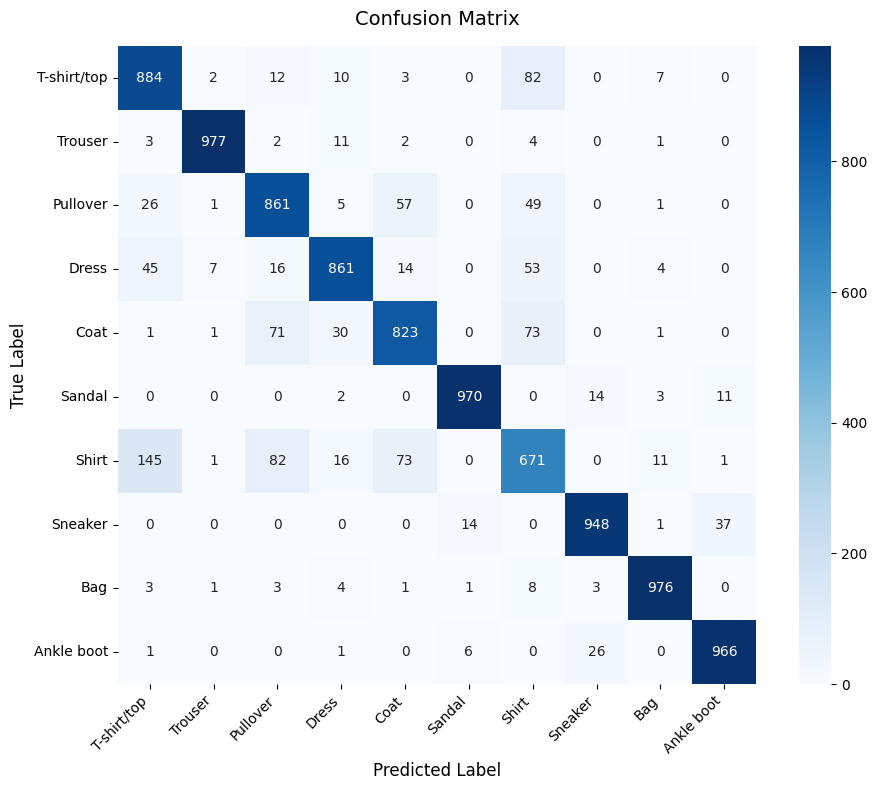

In [ ]:
accuracy, confmat = evaluate_model(
    model=model_loaded,
    dataloader=test_dataloader,
    num_classes=len(class_names),
    class_names=class_names,
    device=device
)